In [2]:
# pip install -- scikit-plot

In [3]:
# library
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

In [4]:
df = pd.read_csv('data_clean.csv')
df.head()

,Unnamed: 0,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
df.columns

Index(['Unnamed: 0', 'CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

# Create Modeling Dataset

In [6]:
# Delete Irrelavent Fields Based On EDA
df_model = df.drop(['Unnamed: 0', 'CLIENTNUM', 'Credit_Limit', 'Customer_Age', 'Avg_Open_To_Buy', 'Months_on_book', 'Dependent_count'], axis=1)
df_model.head()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,M,High School,Married,$60K - $80K,Blue,5,1,3,777,1.335,1144,42,1.625,0.061
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue,6,1,2,864,1.541,1291,33,3.714,0.105
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue,4,1,0,0,2.594,1887,20,2.333,0.000
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue,3,4,1,2517,1.405,1171,20,2.333,0.760
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue,5,1,0,0,2.175,816,28,2.500,0.000


In [7]:
# change Attrition_Flag to dummy
df_model['Attrition_Flag'] = df_model['Attrition_Flag'].map({'Existing Customer': 1, 'Attrited Customer': 0})

In [8]:
# change other fields to dummy
df_model=pd.get_dummies(df_model)

# Modeling

In [9]:
# pip install -- imblearn

In [10]:
# Use SMOTE(Synthetic Minority Oversampling Technique) method to balance Attrition data
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# X = df_model.drop("Attrition_Flag", axis=1, inplace=True)
X = df_model.loc[:, df_model.columns != "Attrition_Flag"]
y = df_model["Attrition_Flag"]

# Slice Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [11]:
# SMOTE
sm = SMOTE(sampling_strategy="minority", k_neighbors=20, random_state=42)

X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

## 1. Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_res, y_train_res)

RandomForestClassifier()

## 2. SVM (Support Vector Machine)

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm.fit(X_train_res, y_train_res)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

## 3. Boosting Tree

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100,
                                learning_rate=1.0,
                                max_depth=1,
                                random_state=42)

gb.fit(X_train_res, y_train_res)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=42)

## Model Comparision

In [16]:
y_rf = rf.predict(X_test)
y_svm = svm.predict(X_test)
y_gb = gb.predict(X_test)

c:\Users\65159\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\65159\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\65159\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods:

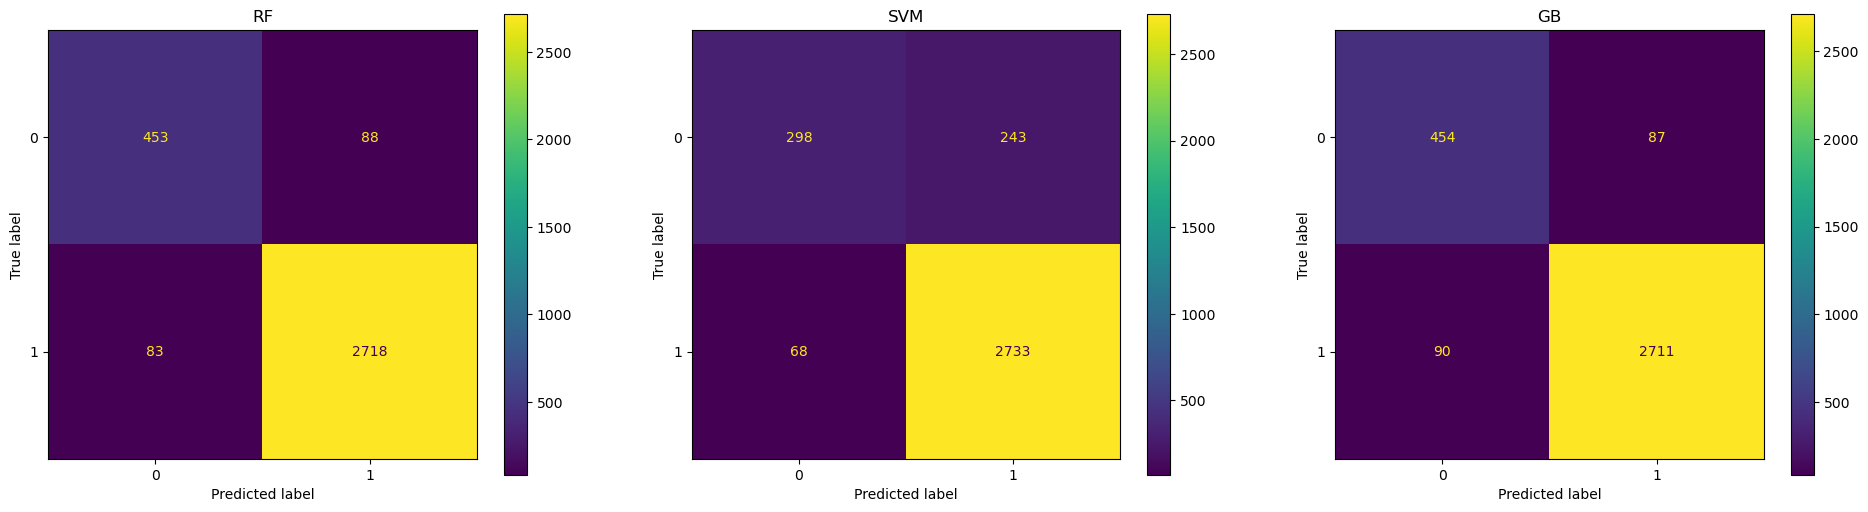

In [18]:
# Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix

fig,ax=plt.subplots(ncols=3, figsize=(20,6))

plot_confusion_matrix(rf, X_test, y_test, ax=ax[0])
ax[0].title.set_text('RF')

plot_confusion_matrix(svm, X_test, y_test, ax=ax[1])
ax[1].title.set_text('SVM')

plot_confusion_matrix(gb, X_test, y_test, ax=ax[2])
ax[2].title.set_text('GB')
fig.tight_layout(pad=5)

plt.show()

In [26]:
# Classification Scores
# classification_report, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score

print('Random Forest Classifier')
print(classification_report(y_test, y_rf))

print('------------------------------------------------------')
print('Support Vector Machine')
print(classification_report(y_test, y_svm))

print('------------------------------------------------------')
print('Gradient Boosting')
print(classification_report(y_test, y_gb))

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       541
           1       0.97      0.97      0.97      2801

    accuracy                           0.95      3342
   macro avg       0.91      0.90      0.91      3342
weighted avg       0.95      0.95      0.95      3342

------------------------------------------------------
Support Vector Machine
              precision    recall  f1-score   support

           0       0.81      0.55      0.66       541
           1       0.92      0.98      0.95      2801

    accuracy                           0.91      3342
   macro avg       0.87      0.76      0.80      3342
weighted avg       0.90      0.91      0.90      3342

------------------------------------------------------
Gradient Boosting
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       541
           1       0.97      0.97      0.97      2801

    ac

Based on confusion matrix and classification score, we can see that RF and SVM are better than GB